# Exercise 11

Use wine dataset from sklearn.datasets to classify wines into 3 categories. Load the dataset and split it into test and train. After that train the model using Gaussian and Multinominal classifier and post which model performs better. Use the trained model to perform some predictions on test data.

# Import all essentials

In [109]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sn

# Load the wine data

In [110]:
data = load_wine()
dir(data)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [111]:
data.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

# Make it into a DataFrame and append the target column

In [112]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


# GroupBy the target column

In [113]:
df.groupby('target').describe()

alcohol                                                             \
         count       mean       std    min     25%     50%     75%    max   
target                                                                      
0         59.0  13.744746  0.462125  12.85  13.400  13.750  14.100  14.83   
1         71.0  12.278732  0.537964  11.03  11.915  12.290  12.515  13.86   
2         48.0  13.153750  0.530241  12.20  12.805  13.165  13.505  14.34   

       malic_acid            ... od280/od315_of_diluted_wines       proline  \
            count      mean  ...                          75%   max   count   
target                       ...                                              
0            59.0  2.010678  ...                         3.42  4.00    59.0   
1            71.0  1.932676  ...                         3.16  3.69    71.0   
2            48.0  3.333750  ...                         1.82  2.47    48.0   

                                                                       
               mean         std    min    25%     50%     75%     max  
target                                                                 
0       1115.711864  221.520767  680.0  987.5  1095.0  1280.0  1680.0  
1        519.507042  157.211220  278.0  406.5   495.0   625.0   985.0  
2        629.895833  115.097043  415.0  545.0   627.5   695.0   880.0  

[3 rows x 104 columns]

In [114]:
df.shape

(178, 14)

# Split into X and y

In [115]:
X = df.drop(['target'], axis=1)
y = df['target']

# Split into Training and Testing dataset

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# K Fold Cross Validation

In [117]:
kf = StratifiedKFold(n_splits=10)

In [118]:
gaussian = cross_val_score(GaussianNB(), X, y, cv=kf)

In [119]:
multinomial = cross_val_score(MultinomialNB(), X, y, cv=kf)

In [120]:
print(f"Gaussian NB average score {np.mean(gaussian)}")
print(f"Multinomial NB average score {np.mean(multinomial)}")

Gaussian NB average score 0.9777777777777779
Multinomial NB average score 0.8496732026143791


So we can see clearly that Gaussian NB is doing better here

# Using Gaussian Naive Bayes model 

In [121]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [122]:
model.score(X_test, y_test)

1.0

# Predictions 

### Checking the value at index 99

In [123]:
test = np.array(X.iloc[99])
test

array([ 12.29,   3.17,   2.21,  18.  ,  88.  ,   2.85,   2.99,   0.45,
         2.81,   2.3 ,   1.42,   2.83, 406.  ])

### Checking the target at index 99

In [124]:
y[99]

1

### Predicting the value at index 99

In [125]:
model.predict([test])

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1])

In [126]:
predict = model.predict(X_test)
predict

array([0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 0, 0,
       2, 2, 1, 0, 1, 1, 1, 1, 2, 1, 2, 0, 0, 1, 0, 1, 0, 0, 2, 2, 0, 1,
       2])

In [149]:
# model.predict_proba(X_test)

# Using Confusion Matrix 

Text(95.72222222222221, 0.5, 'Truth')

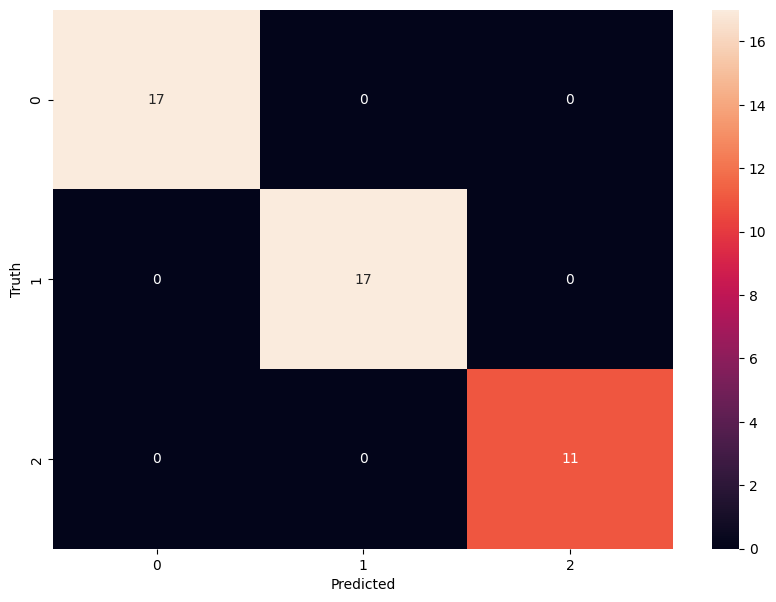

In [141]:
cm = confusion_matrix(y_test, predict)
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

# Making a new DataFrame from Actual and Predicted Values

In [150]:
obj = {
    "Actual Value" : y_test,
    "Predicted Value" : predict
}

valuedf = pd.DataFrame(obj)
valuedf

,Actual Value,Predicted Value
1,0,0
36,0,0
174,2,2
115,1,1
56,0,0
47,0,0
42,0,0
19,0,0
96,1,1
30,0,0
